# Problem 2
## Instructions
- Please submit your assignment in **"ipynb"** format with all runtime records and text comments.
- The description of the data used in the assignment is as below:

### Data Description
- **Title:** Vertebral column data set
- **Source:** UCI Machine Learning Repository by Dr. Henrique da Mota
- **Purpose:** To diagnose orthopedic patients’ vertebral columns as “irregular” (exhibiting spondylolisthesis or disk hernia) or “regular”
- **Repository:** [Vertebral Column Dataset](https://raw.githubusercontent.com/sesillim/ai/main/vertebral_column.csv)

### Features
1. **pelvic_incidence**
2. **pelvic_tilt**
3. **lumbar_angle**
4. **sacral_slope**
5. **pelvic_radius**
6. **spondylolisthesis_grade**

### Target
- **class:** 1 = “Irregular” or 0 = “Regular”

## Tasks
1. **How many observations are in the data?**
2. **Build a logistic regression model. Examine whether the scaling improves the fit of the model.** You can choose any scaling method for the examination.
3. **Examine whether changing the regularization method or hyperparameter values improves model performance.** You should try at least 5 different hyperparameter values for the optimization.



In [2]:
import pandas as pd
import numpy as np

In [3]:
import requests
from io import StringIO

In [4]:
url = 'https://raw.githubusercontent.com/sesillim/ai/main/vertebral_column.csv'
response = requests.get(url)
data = response.text
data = data.replace('"', '')
data = pd.read_csv(StringIO(data), delimiter='\t')

In [5]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


## 1. **How many observations are in the data?**

In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742,0.677419
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883,0.468220
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000,0.000000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000,0.000000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000,1.000000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000,1.000000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.000000


**Count = 310**

## 2. **Build a logistic regression model. Examine whether the scaling improves the fit of the model.** You can choose any scaling method for the examination.

### Logistic Regression without scaling

In [7]:
X = data.drop('class', axis='columns')
y = data['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [10]:
y_logreg_pred = logreg.predict(X_test)
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_logreg_pred))

Accuracy:  0.8076923076923077


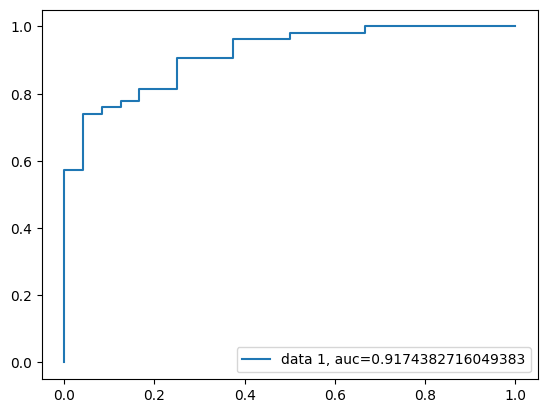

In [11]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'data 1, auc={str(auc)}')
plt.legend(loc=4)
plt.show()

### Logistic Regression with scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
logreg_scaled = LogisticRegression(max_iter=5000)

In [14]:
logreg_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

In [15]:
y_pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_logreg_scaled))

Accuracy:  0.8076923076923077


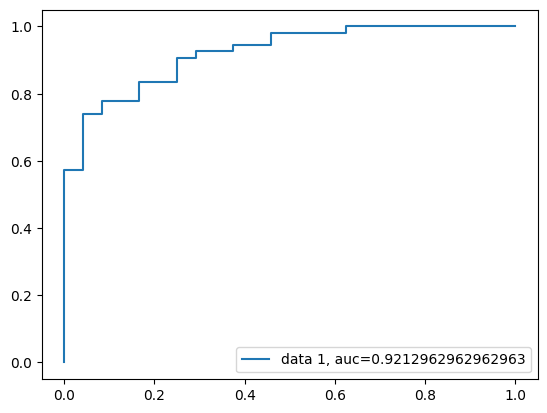

In [17]:
y_pred_proba_with_scaling = logreg_scaled.predict_proba(X_test_scaled)[::,1]
fpr_s, tpr_s, thresholds_s = metrics.roc_curve(y_test, y_pred_proba_with_scaling)
auc = metrics.roc_auc_score(y_test, y_pred_proba_with_scaling)
plt.plot(fpr_s, tpr_s, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 3. **Examine whether changing the regularization method or hyperparameter values improves model performance.** You should try at least 5 different hyperparameter values for the optimization.

### Logistic Regression with L2 Regularization. C_values = [0.01, 0.1, 1, 10, 100]

In [19]:
from sklearn.metrics import accuracy_score

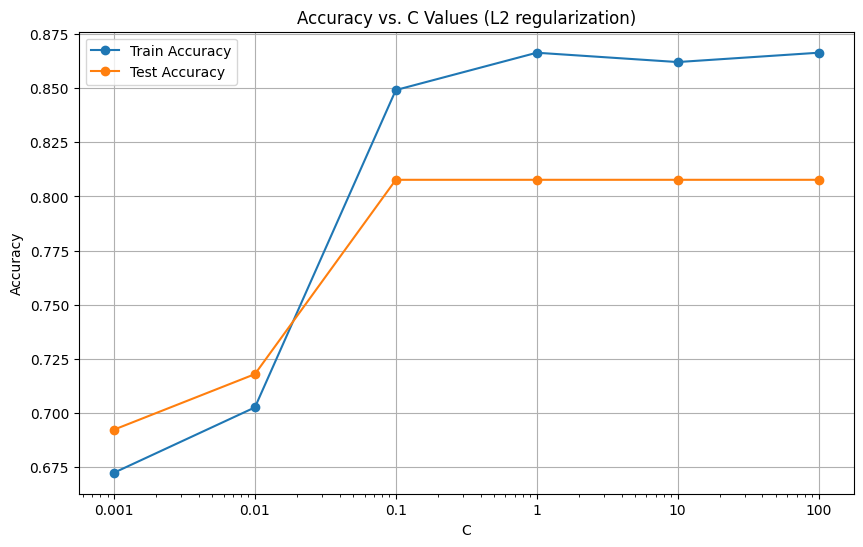

In [23]:
# Define different values for the regularization parameter C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store accuracy scores for different C values
train_accuracy = []
test_accuracy = []

# Iterate over C values
for C in C_values:
  
  # Train a logistic regression model
  model = LogisticRegression(C=C, max_iter=1000, random_state=42)
  model.fit(X_train_scaled, y_train)
  
  # Predictions on training and test sets
  y_train_pred = model.predict(X_train_scaled)
  y_test_pred = model.predict(X_test_scaled)
  
  # Calculate accuracy scores
  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)
  
  # Append to lists
  train_accuracy.append(train_acc)
  test_accuracy.append(test_acc)

# Plotting the accuracy scores for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(C_values, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. C Values (L2 regularization)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xticks(C_values, labels=[str(val) for val in C_values])
plt.grid(True)
plt.legend()
plt.show()

### Logistic Regression with L1 Regularization. C_values = [0.01, 0.1, 1, 10, 100]

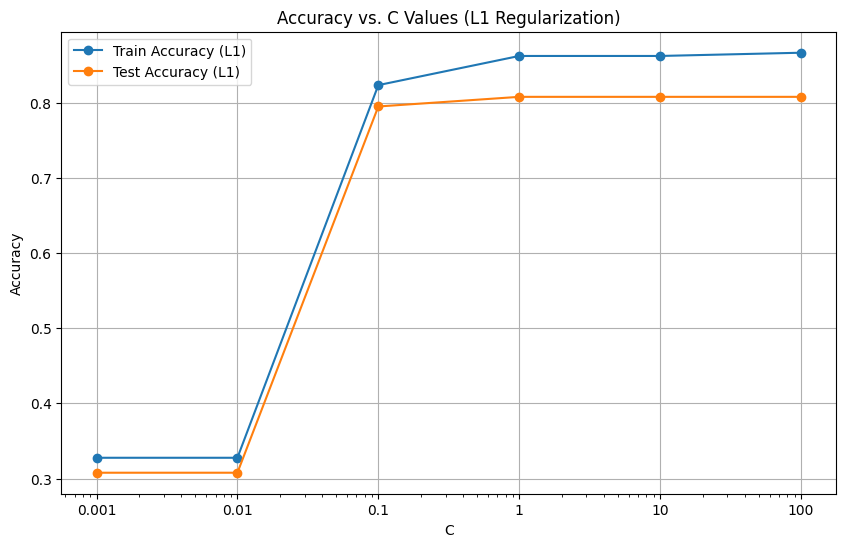

In [21]:
# Define different values for the regularization parameter C with L1 penalty
C_values_l1 = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store accuracy scores for different C values with L1 penalty
train_accuracy_l1 = []
test_accuracy_l1 = []

# Iterate over C values with L1 penalty
for C in C_values_l1:
    # Train a logistic regression model with L1 penalty
    model_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000, random_state=42)
    model_l1.fit(X_train_scaled, y_train)
    
    # Predictions on training and test sets
    y_train_pred_l1 = model_l1.predict(X_train_scaled)
    y_test_pred_l1 = model_l1.predict(X_test_scaled)
    
    # Calculate accuracy scores
    train_acc_l1 = accuracy_score(y_train, y_train_pred_l1)
    test_acc_l1 = accuracy_score(y_test, y_test_pred_l1)
    
    # Append to lists
    train_accuracy_l1.append(train_acc_l1)
    test_accuracy_l1.append(test_acc_l1)

# Plotting the accuracy scores for different C values with L1 penalty
plt.figure(figsize=(10, 6))
plt.plot(C_values_l1, train_accuracy_l1, marker='o', label='Train Accuracy (L1)')
plt.plot(C_values_l1, test_accuracy_l1, marker='o', label='Test Accuracy (L1)')
plt.title('Accuracy vs. C Values (L1 Regularization)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xticks(C_values_l1, labels=[str(val) for val in C_values_l1])
plt.grid(True)
plt.legend()
plt.show()

## Final Verdict

After the above analysis, we can conclude that for this particular dataset, the **accuracy** **doesn't** seem to **improve** even after scaling the data and applying regularizations on the scaled data. Instead, for some lower regularization parameters values, the accuracy is very low for training and testing phase.